In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import re
from spacytextblob.spacytextblob import SpacyTextBlob
from tqdm import tqdm
from tqdm.auto import tqdm 

plt.rcParams["figure.figsize"] = (12,8)
tqdm.pandas()

In [2]:
cleaned_data = pd.read_hdf("Data/full.h5")
cleaned_data

,User ID,Tweet ID,Text,Date,lat,lon
0,22077441,10538487904,Ok today I have to find something to wear for ...,2010-03-15 17:35:58,43.009815,-83.710408
1,22077441,10536835844,I am glad I'm having this show but I can't wai...,2010-03-15 16:53:44,43.009815,-83.710408
2,22077441,10536809086,Honestly I don't even know what's going on any...,2010-03-15 16:52:59,43.009815,-83.710408
3,22077441,10534149786,@LovelyJ_Janelle hey sorry I'm sitting infront...,2010-03-15 15:42:07,43.009815,-83.710408
4,22077441,10530203659,Sitting infront of this sewing machine ... I d...,2010-03-15 13:55:22,43.009815,-83.710408
...,...,...,...,...,...,...
5108327,73016661,8082730603,@NYCsocialit3 nun u,2010-01-22 14:14:30,40.627262,-73.926384
5108328,73016661,8081316956,RT @BonesThisWorld: A trip too harlem for a fe...,2010-01-22 13:28:51,40.627262,-73.926384
5108329,73016661,8076088351,@Uniquehope was good,2010-01-22 10:53:13,40.627262,-73.926384
5108330,73016661,8075627082,@DaStar6MFM lmaooo yea dat shit is crazy,2010-01-22 10:40:05,40.627262,-73.926384


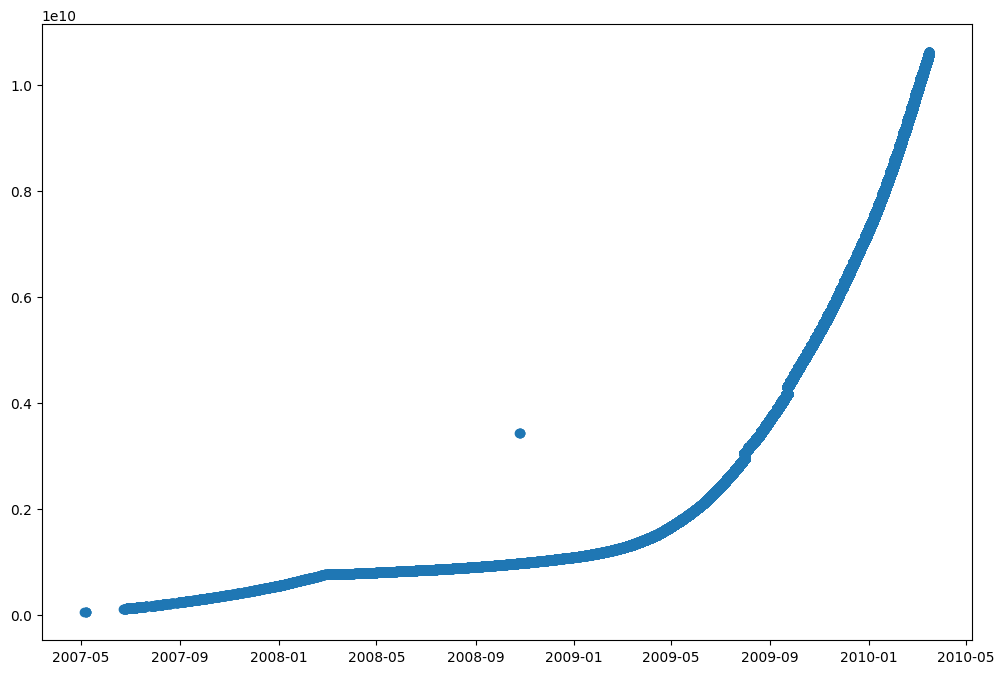

In [3]:
plt.scatter(cleaned_data["Date"],cleaned_data["Tweet ID"])
plt.show()

In [4]:
cleaned_data['Date Only'] = cleaned_data['Date'].apply(lambda x: x.date())
cleaned_data

,User ID,Tweet ID,Text,Date,lat,lon,Date Only
0,22077441,10538487904,Ok today I have to find something to wear for ...,2010-03-15 17:35:58,43.009815,-83.710408,2010-03-15
1,22077441,10536835844,I am glad I'm having this show but I can't wai...,2010-03-15 16:53:44,43.009815,-83.710408,2010-03-15
2,22077441,10536809086,Honestly I don't even know what's going on any...,2010-03-15 16:52:59,43.009815,-83.710408,2010-03-15
3,22077441,10534149786,@LovelyJ_Janelle hey sorry I'm sitting infront...,2010-03-15 15:42:07,43.009815,-83.710408,2010-03-15
4,22077441,10530203659,Sitting infront of this sewing machine ... I d...,2010-03-15 13:55:22,43.009815,-83.710408,2010-03-15
...,...,...,...,...,...,...,...
5108327,73016661,8082730603,@NYCsocialit3 nun u,2010-01-22 14:14:30,40.627262,-73.926384,2010-01-22
5108328,73016661,8081316956,RT @BonesThisWorld: A trip too harlem for a fe...,2010-01-22 13:28:51,40.627262,-73.926384,2010-01-22
5108329,73016661,8076088351,@Uniquehope was good,2010-01-22 10:53:13,40.627262,-73.926384,2010-01-22
5108330,73016661,8075627082,@DaStar6MFM lmaooo yea dat shit is crazy,2010-01-22 10:40:05,40.627262,-73.926384,2010-01-22


In [9]:
tweets_by_date = cleaned_data.groupby(by='Date Only').size()
tweets_by_date

Date Only
2007-05-04        1
2007-05-06        1
2007-05-07        3
2007-06-22        2
2007-06-23        5
              ...  
2010-03-13    37395
2010-03-14    22343
2010-03-15    20212
2010-03-16    11314
2010-03-17      893
Length: 985, dtype: int64

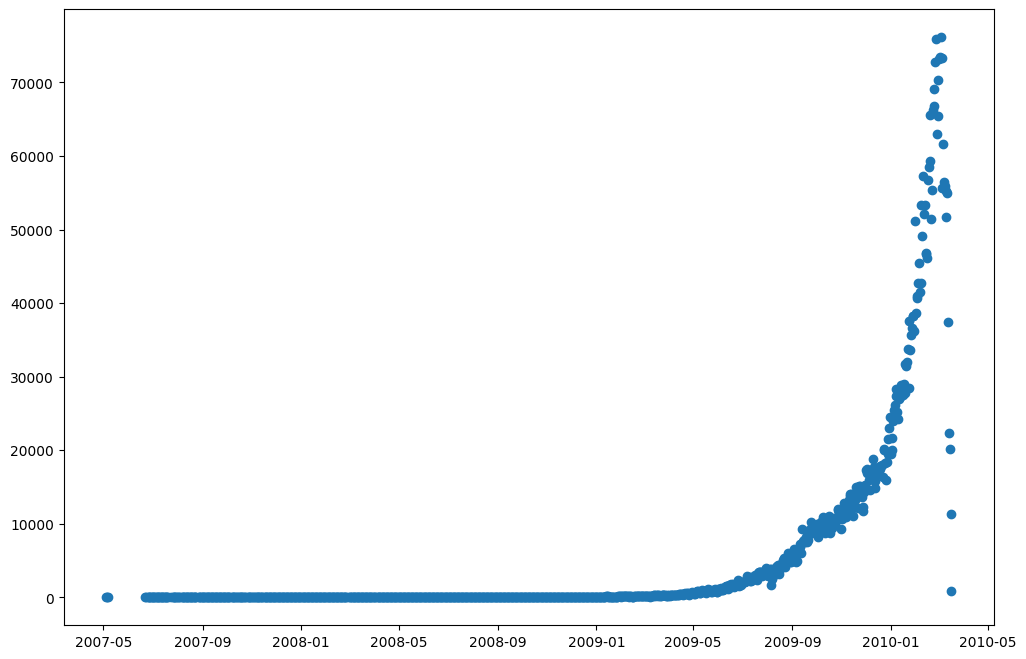

In [10]:
plt.scatter(tweets_by_date.index,tweets_by_date)

In [11]:
date_tweets = cleaned_data[cleaned_data['Date'] > '01-01-2010']
date_tweets = date_tweets[date_tweets['Date'] < '03-01-2010']

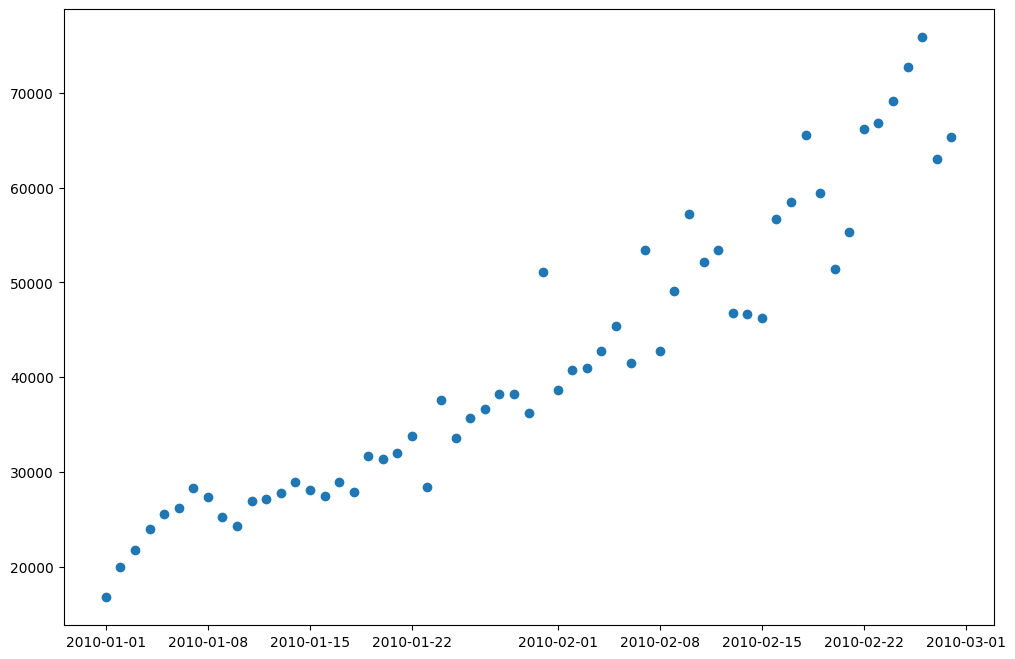

In [13]:
filtered_tweets_by_date = date_tweets.groupby(by='Date Only').size()
plt.scatter(filtered_tweets_by_date.index,filtered_tweets_by_date)

In [16]:
nlp = spacy.load('en_core_web_lg')
nlp.add_pipe('spacytextblob')

In [ ]:
date_tweets['Sentiment'] = date_tweets['Text'].progress_apply(lambda x: nlp(x)._.blob.polarity)
date_tweets

  0%|          | 0/2450514 [00:00<?, ?it/s]

In [ ]:
date_tweets['Subjectivity'] = date_tweets['Text'].progress_apply(lambda x: nlp(x)._.blob.subjectivity)
date_tweets

In [ ]:
date_tweets.to_csv('data/sentiment_analysed.csv')